# 畳み込みニューラルネット

## 概要


Convolutional Neural Network(畳み込みニューラルネット)は略してCNNと呼ばれる。

CNNは一般的な順伝播型のニューラルネットワークとは違い、全結合層だけでなく畳み込み層(Convolution Layer)とプーリング層(Pooling Layer)から構成される

## 処理の流れ
+ **入力層**：入力ベクトル(画像など)を入力する
+ **特徴抽出**：入力ベクトルから、そのベクトルを象徴するようなベクトルに変換する
    + **畳み込み層**
    + **プーリング層**
+ **フラット層**：高次元ベクトルを1次元ベクトルに変更する
+ **全結合層**（中間層）：通常のニューラルネット
+ **出力層**：分類結果を出力する

## 処理イメージ
### 引用：https://kenyu-life.com/2019/03/07/convolutional_neural_network/
+ 全体
<img src="./images/CNN_sample.jpg" width="80%">
+ 畳み込み層
    + 1次元(グレースケール)
<img src="./images/CNN_conv.gif" width="60%">
    + 3次元(RGB)
<img src="./images/CNN_conv_3D.gif" width="60%">
+ プーリング層
<img src="./images/CNN_pooling.gif" width="60%">

# CNNで扱う問題

大きく分けて下記のものがあります。この講座では、分類問題を扱ってみます。

+ 分類：画像が何を表しているか識別する
<img src="./images/classification.png" width="20%" style="position:relative;left:-40%;">

+ 検出：任意の物体が存在する領域を識別する
<img src="./images/detection.png" width="20%" style="position:relative;left:-40%;">

+ セグメンテーション：画像内の各領域がそれぞれ何を表しているかを識別する

# 分類

画像に何が書かれているのかを判別する。

MNISTという手書き文字の画像を使用していく。

# 学習データの生成

In [1]:
# 画像データの読み込み
from keras.datasets import mnist
import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.
c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [2]:
# データの形式
print(
    X_train.shape,
    y_train.shape,
    X_test.shape,
    y_test.shape
)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# データ確認

In [3]:
# 画像データ
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

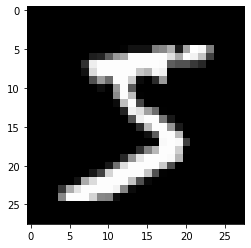

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0],cmap="gray")

In [5]:
# 正解ラベル
y_train[0]

5

# データの変形

In [6]:
# データの正規化
# グレースケールのため、最大値は255
X_train = X_train/255
X_test = X_test/255
y_train = y_train
y_test = y_test

In [7]:
# CNNに使用するためにデータを変形(グレースケール)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [8]:
# ベクトルからone hotに変換する
import keras
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

# モデル作成

In [9]:
# 必要なライブラリのインポート
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

In [10]:
# 基本モデル作成
model = Sequential()

# 3×3の畳み込み層の追加
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation='relu',
    )
)

# 2×2のmaxプーリング層追加
model.add(
    MaxPooling2D(
        pool_size=(2, 2)
    )
)

# ドロップアウト層の追加
model.add(
    Dropout(0.2)
)

# フラット層の追加
model.add(
    Flatten()
)

# 全結合層の追加
model.add(
    Dense(
        128, 
        activation='relu'
    )
)

# ドロップアウト層の追加
model.add(
    Dropout(0.2)
)

# 出力層
model.add(
    Dense(
        10, 
        activation='softmax'
    )
)

# モデルの学習

In [11]:
# モデルの学習設定
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=optimizers.SGD(lr=0.01),
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# モデルの学習
result = model.fit(
    X_train,
    y_train,
    batch_size=256,
    epochs=10,
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 4s 60us/step - loss: 1.5352 - accuracy: 0.5939
Epoch 2/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.5773 - accuracy: 0.8321
Epoch 3/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.4505 - accuracy: 0.8656
Epoch 4/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.3971 - accuracy: 0.8816
Epoch 5/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.3654 - accuracy: 0.8913
Epoch 6/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.3396 - accuracy: 0.8979
Epoch 7/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.3191 - accuracy: 0.9044
Epoch 8/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.3026 - accuracy: 0.9100
Epoch 9/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.2867 - accuracy: 0.9146
Epoch 1

In [13]:
# モデル結果の出力(loss acc)
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.19779455832391976, 0.942300021648407]
